In [13]:
# load from news.2013.en.trainlen.200.evaluation.100000.merged.csv
import pandas as pd
import numpy as np

# load data
data = pd.read_csv('news.2013.en.trainlen.200.evaluation.100000.merged.csv')
# print columns
print(data.columns)
def proportion_of_chars(s, chars):
    return sum(c in chars for c in s) / len(s)

# Creating new columns based on the specified character proportions
data['proportion of e in text'] = data['text'].apply(lambda x: proportion_of_chars(x, 'e'))
data['proportion of spaces in text'] = data['text'].apply(lambda x: proportion_of_chars(x, ' '))
data['proportion of x or q or j or z in text'] = data['text'].apply(lambda x: proportion_of_chars(x, 'xqjz'))


Index(['original_text', 'text', 'bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence', 'lang', 'weird', 'enigma_generated_text_17510',
       'enigma_error_count_17510',
       'en_noisevignere_checkpoint-10000_error_count',
       'en_noisevignere_checkpoint-10000_generated_text',
       'en_noisevignere_checkpoint-15000_error_count',
       'en_noisevignere_checkpoint-15000_generated_text',
       'en_noisevignere_checkpoint-20000_error_count',
       'en_noisevignere_checkpoint-20000_generated_text',
       'en_noisevignere_checkpoint-5000_error_count',
       'en_noisevignere_checkpoint-5000_generated_text',
       'en_noisyconsteenigma_checkpoint-10000_error_count',
       'en_noisyconsteenigma_checkpoint-10000_generated_text',
       'en_noisyconsteenigma_checkpoint-15000_error_count',
       'en_noisyconsteenigma_checkpoint-15000_gen

In [14]:
enigmaevolution_columns = [
       'en_noisyconsteenigma_checkpoint-5000_error_count',
       'en_noisyconsteenigma_checkpoint-10000_error_count',
       'en_noisyconsteenigma_checkpoint-15000_error_count',
       'en_noisyconsteenigma_checkpoint-20000_error_count',
]

In [15]:
vignereevolution_columns = [
       'en_noisevignere_checkpoint-5000_error_count',
       'en_noisevignere_checkpoint-10000_error_count',
       'en_noisevignere_checkpoint-15000_error_count',
       'en_noisevignere_checkpoint-20000_error_count',
]

In [16]:
vig3_cols = [
    "en_noisevignere3_500_error_count",
    "en_noisevignere3_1000_error_count",
    "en_noisevignere3_1500_error_count",
    "en_noisevignere3_2000_error_count",
    "en_noisevignere3_2500_error_count",
    "en_noisevignere3_3000_error_count",
    "en_noisevignere3_3500_error_count",
    "en_noisevignere3_4000_error_count",
]

In [17]:
# add a column for length of 'text'
data['text_length'] = data['text'].apply(len)


In [18]:
# for each evoltuion column replace it with the error rate
for column in enigmaevolution_columns:
    data[column] = data[column] / data['text_length']
# remove rows which have error rate > 1
data = data[data[enigmaevolution_columns].apply(lambda x: x < 1).all(axis=1)]

for column in vignereevolution_columns:
    data[column] = data[column] / data['text_length']

for column in vig3_cols:
    data[column] = data[column] / data['text_length']
    


In [19]:
# remove rows which have error rate > 1, that's clearly a bug
data = data[data[vignereevolution_columns].apply(lambda x: x < 1).all(axis=1)]
# print number of rows
print(len(data))
# rename all columns containing *count to *rate
data.rename(columns=lambda x: x.replace('_count', '_rate'), inplace=True)
# rename in the same way the columns in enigmaevolution_columns and vignereevolution_columns
enigmaevolution_columns = [x.replace('_count', '_rate') for x in enigmaevolution_columns]
vignereevolution_columns = [x.replace('_count', '_rate') for x in vignereevolution_columns]
vig3_cols = [x.replace('_count', '_rate') for x in vig3_cols]

99889


In [21]:
data.columns

Index(['original_text', 'text', 'bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence', 'lang', 'weird', 'enigma_generated_text_17510',
       'enigma_error_rate_17510',
       'en_noisevignere_checkpoint-10000_error_rate',
       'en_noisevignere_checkpoint-10000_generated_text',
       'en_noisevignere_checkpoint-15000_error_rate',
       'en_noisevignere_checkpoint-15000_generated_text',
       'en_noisevignere_checkpoint-20000_error_rate',
       'en_noisevignere_checkpoint-20000_generated_text',
       'en_noisevignere_checkpoint-5000_error_rate',
       'en_noisevignere_checkpoint-5000_generated_text',
       'en_noisyconsteenigma_checkpoint-10000_error_rate',
       'en_noisyconsteenigma_checkpoint-10000_generated_text',
       'en_noisyconsteenigma_checkpoint-15000_error_rate',
       'en_noisyconsteenigma_checkpoint-15000_generated_

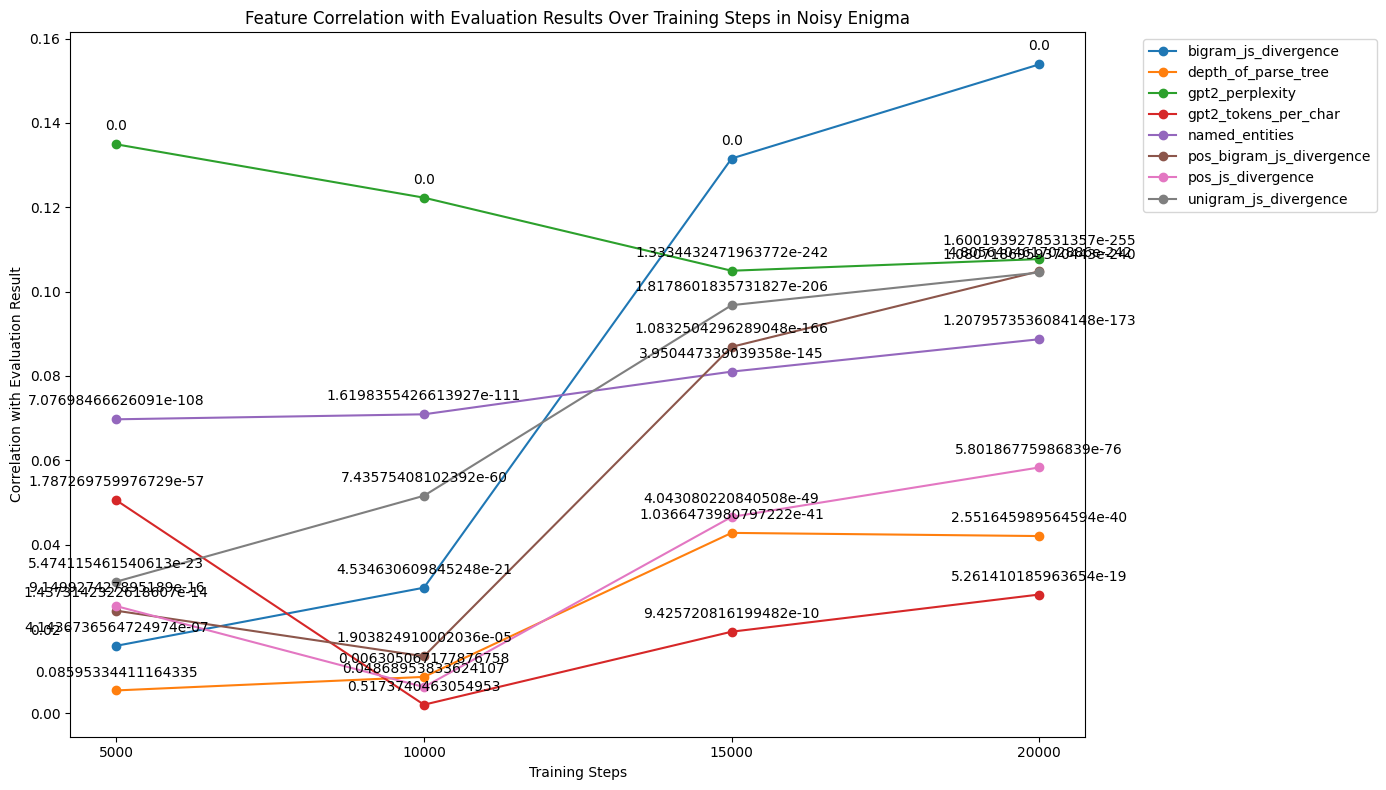

In [22]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

features = ['bigram_js_divergence', 'depth_of_parse_tree',
            'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
            'pos_bigram_js_divergence', 'pos_js_divergence',
            'unigram_js_divergence']

steps = [5000, 10000, 15000, 20000]

correlation_data = []
p_values_data = []  # To store p-values

# Calculate correlation and p-values for each feature across steps
for feature in features:
    feature_correlations = []
    feature_p_values = []
    for step in steps:
        ev_col = f"en_noisyconsteenigma_checkpoint-{step}_error_rate"
        # Calculate correlation and p-value between feature and evaluation result at this step
        correlation, p_value = pearsonr(data[feature], data[ev_col] )
        feature_correlations.append(abs(correlation))  # Storing magnitude of correlation
        feature_p_values.append(p_value)  # Storing p-value
    correlation_data.append(feature_correlations)
    p_values_data.append(feature_p_values)

# Convert correlation and p-values data into DataFrames for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)
p_values_df = pd.DataFrame(p_values_data, index=features, columns=steps)

# Plotting with p-value annotations
plt.figure(figsize=(14, 8))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)
    for step, corr, p_val in zip(steps, correlation_df.loc[feature], p_values_df.loc[feature]):
        plt.annotate(f"{p_val}", (step, corr), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Enigma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

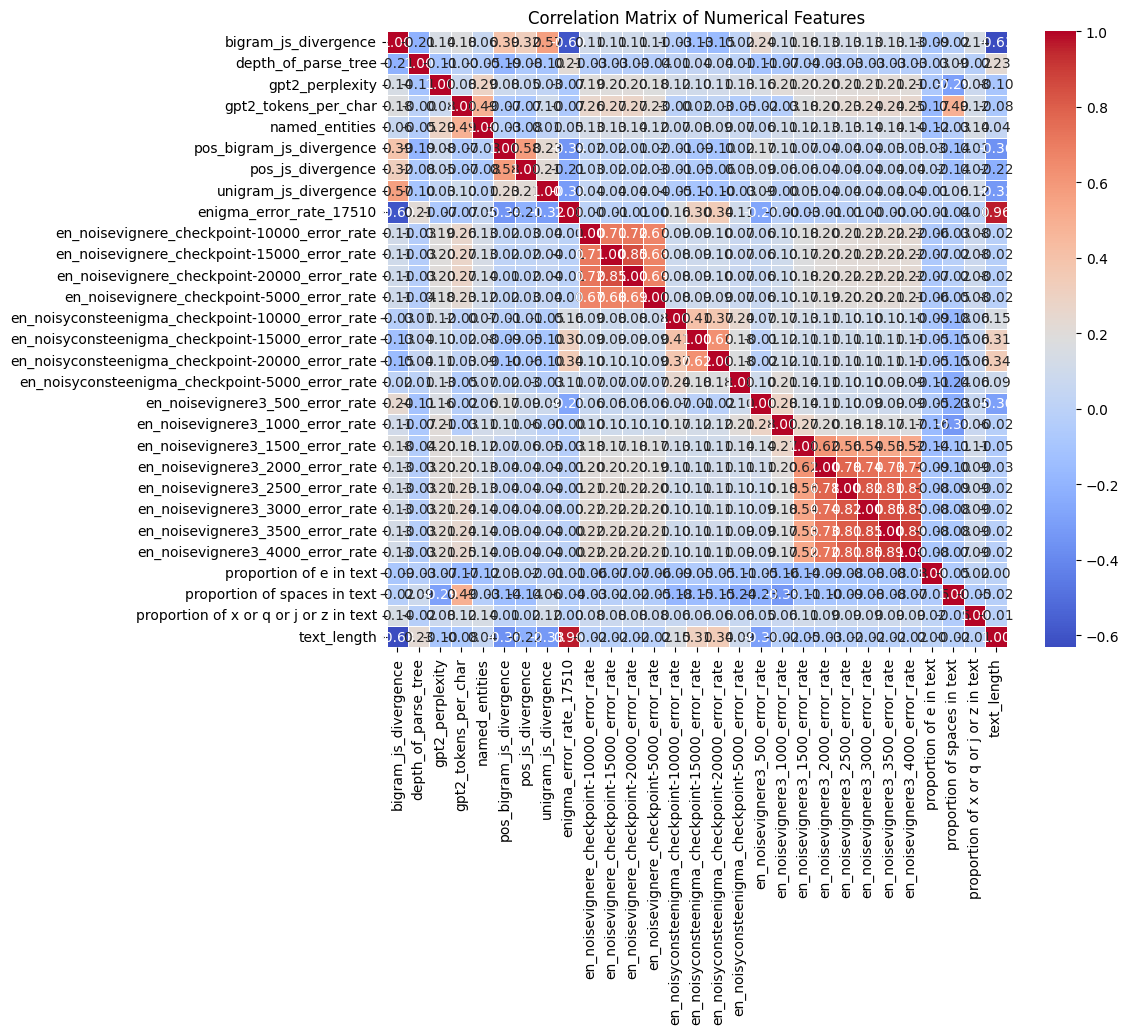

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# print correlation matrix between all the nontext columns

numerical_df = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Printing the correlation matrix
plt.figure(figsize=(10, 8)) # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# print(correlation_matrix)



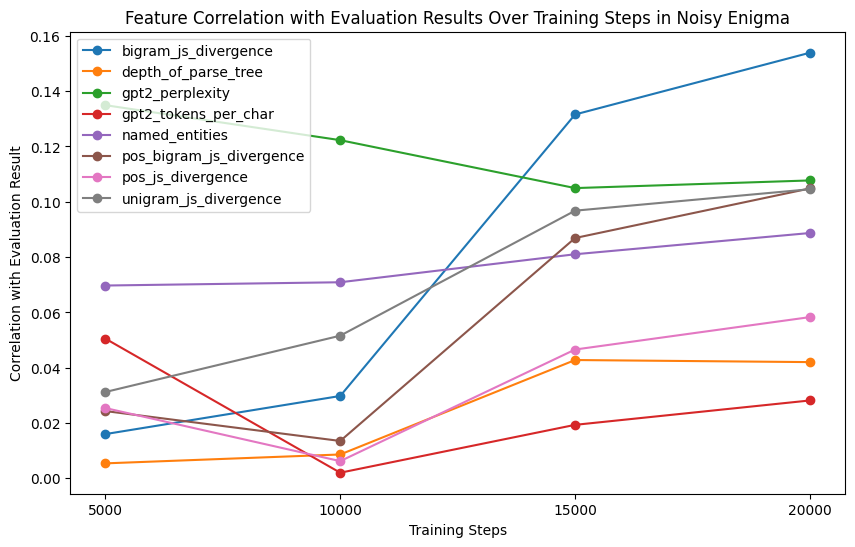

In [27]:
# plot evolution of correlations for each feature over the 4 checkpoints corr
features = ['bigram_js_divergence', 'depth_of_parse_tree',
       'gpt2_perplexity', 'gpt2_tokens_per_char', 'named_entities',
       'pos_bigram_js_divergence', 'pos_js_divergence',
       'unigram_js_divergence']

steps = [5000, 10000, 15000, 20000]

correlation_data = []
# Calculate correlation for each feature across steps
for feature in features:  # 'features' should be replaced with your list of feature column names
    feature_correlations = []
    for step in steps:
        # en_noisyconsteenigma_checkpoint-5000_error_rate
        ev_col = f"en_noisyconsteenigma_checkpoint-{step}_error_rate"  
        # Calculate magnitude of correlation between feature and evaluation result at this step
        correlation = abs(data[feature].corr(data[ev_col]))
        feature_correlations.append(correlation)
    correlation_data.append(feature_correlations)

# Convert correlation data into a DataFrame for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)

# Plotting
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Enigma')
plt.legend()
plt.show()


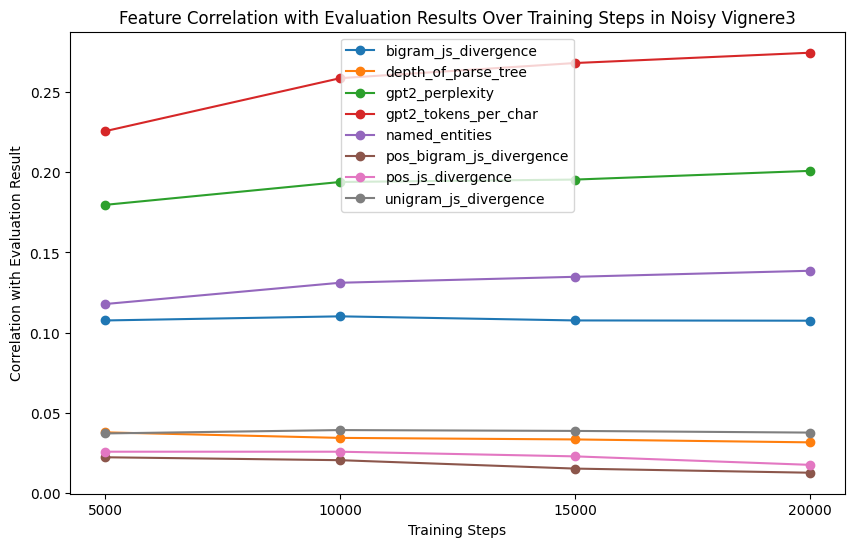

In [28]:

correlation_data = []
# Calculate correlation for each feature across steps
for feature in features:  # 'features' should be replaced with your list of feature column names
    feature_correlations = []
    for step in steps:
        # en_noisyconsteenigma_checkpoint-5000_error_rate
        ev_col= f"en_noisevignere_checkpoint-{step}_error_rate"
        # ev_col = f"en_noisevignere3_{step}_error_rate"  
        # Calculate magnitude of correlation between feature and evaluation result at this step
        correlation = abs(data[feature].corr(data[ev_col]))
        feature_correlations.append(correlation)
    correlation_data.append(feature_correlations)

# Convert correlation data into a DataFrame for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)

# Plotting
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Vignere3')
plt.legend()
plt.show()

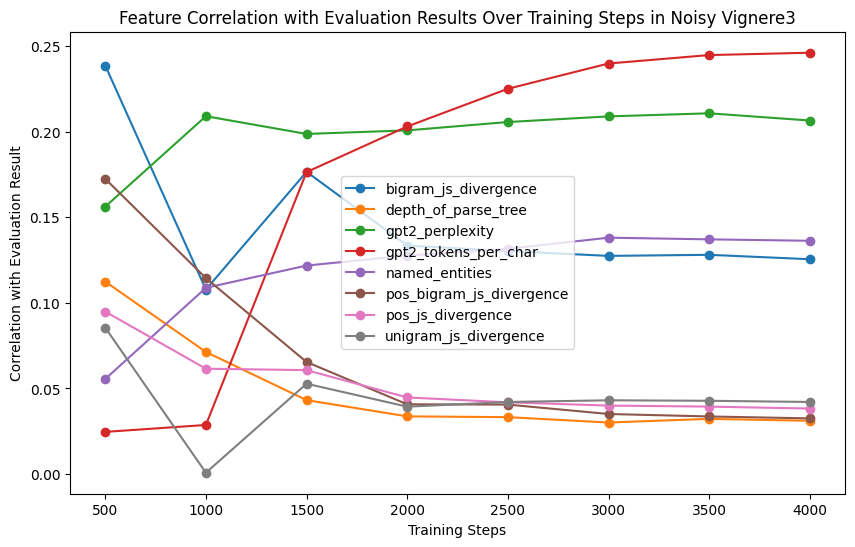

In [25]:
# do the same for vig3
steps = [500,1000,1500, 2000, 2500, 3000, 3500, 4000
]

correlation_data = []
# Calculate correlation for each feature across steps
for feature in features:  # 'features' should be replaced with your list of feature column names
    feature_correlations = []
    for step in steps:
        # en_noisyconsteenigma_checkpoint-5000_error_rate
        ev_col = f"en_noisevignere3_{step}_error_rate"  
        # Calculate magnitude of correlation between feature and evaluation result at this step
        correlation = abs(data[feature].corr(data[ev_col]))
        feature_correlations.append(correlation)
    correlation_data.append(feature_correlations)

# Convert correlation data into a DataFrame for easy plotting
correlation_df = pd.DataFrame(correlation_data, index=features, columns=steps)

# Plotting
plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(steps, correlation_df.loc[feature], marker='o', label=feature)

plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Correlation with Evaluation Result')
plt.title('Feature Correlation with Evaluation Results Over Training Steps in Noisy Vignere3')
plt.legend()
plt.show()

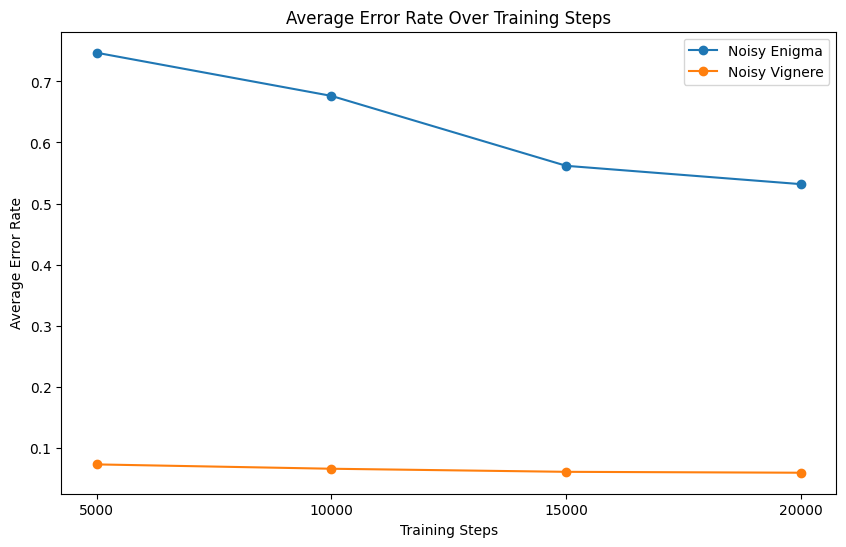

In [14]:
from matplotlib import pyplot as plt
# plot just average error rate for each checkpoint

enigma_error_rates = [data[col].mean() for col in enigmaevolution_columns]
vignere_error_rates = [data[col].mean() for col in vignereevolution_columns]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, enigma_error_rates, marker='o', label='Noisy Enigma')
plt.plot(steps, vignere_error_rates, marker='o', label='Noisy Vignere')
plt.xticks(steps)
plt.xlabel('Training Steps')
plt.ylabel('Average Error Rate')
plt.title('Average Error Rate Over Training Steps')
plt.legend()


Starting resampling process...
Resample 20 completed in 0.16 seconds
Resample 40 completed in 0.16 seconds
Resample 60 completed in 0.16 seconds
Resample 80 completed in 0.18 seconds
Resample 100 completed in 0.16 seconds
Resample 120 completed in 0.23 seconds
Resample 140 completed in 0.16 seconds
Resample 160 completed in 0.16 seconds
Resample 180 completed in 0.16 seconds
Resample 200 completed in 0.17 seconds
Resample 220 completed in 0.17 seconds
Resample 240 completed in 0.16 seconds
Resample 260 completed in 0.16 seconds
Resample 280 completed in 0.17 seconds
Resample 300 completed in 0.21 seconds
Resample 320 completed in 0.17 seconds
Resample 340 completed in 0.16 seconds
Resample 360 completed in 0.16 seconds
Resample 380 completed in 0.17 seconds
Resample 400 completed in 0.16 seconds
Resample 420 completed in 0.16 seconds
Resample 440 completed in 0.16 seconds
Resample 460 completed in 0.16 seconds
Resample 480 completed in 0.16 seconds
Resample 500 completed in 0.16 second

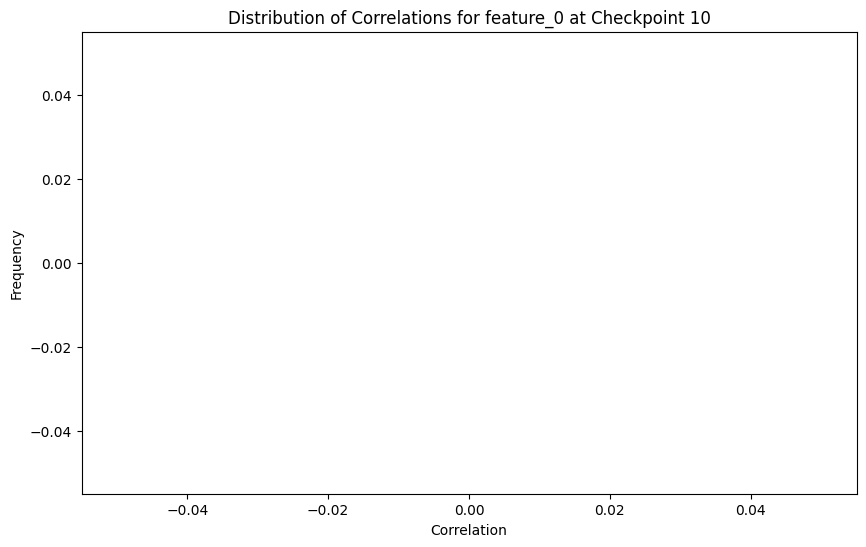

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set random seed for reproducibility
np.random.seed(0)

# Assuming 'data', 'features', and 'steps' are defined elsewhere
# For example, let's assume:
# data = pd.DataFrame(np.random.rand(100000, 10), columns=[f'feature_{i}' for i in range(10)])
# features = data.columns.tolist()
# steps = ['10', '20', '30']  # Replace these with your actual checkpoint steps

# Number of resamples
n_resamples = 1000

# Create a structure to store the resample correlations and p-values
resample_results = []

# Perform resampling and calculate correlations and p-values
print("Starting resampling process...")
for i in range(n_resamples):
    t0 = time.time()
    resampled_data = resample(data, replace=True)  # Ensure 'data' is your DataFrame
    for feature in features:
        for step in steps:
            ev_col = f"en_noisyconsteenigma_checkpoint-{step}_error_rate"
            # Assuming 'ev_col' exists in your DataFrame, replace with actual error rate columns
            correlation, p_value = pearsonr(resampled_data[feature], resampled_data[ev_col])
            resample_results.append((i, feature, step, correlation, p_value))
    t1 = time.time()
    if (i+1) % 20 == 0:
        print(f"Resample {i+1} completed in {t1-t0:.2f} seconds")

# Convert results list to DataFrame
results_df = pd.DataFrame(resample_results, columns=['Resample', 'Feature', 'Checkpoint', 'Correlation', 'P_value'])


In [21]:
results_df

,Resample,Feature,Checkpoint,Correlation,P_value
0,0,bigram_js_divergence,5000,0.018275,7.643412e-09
1,0,bigram_js_divergence,10000,-0.030323,9.167070e-22
2,0,bigram_js_divergence,15000,-0.127716,0.000000e+00
3,0,bigram_js_divergence,20000,-0.154652,0.000000e+00
4,0,depth_of_parse_tree,5000,0.006948,2.810222e-02
...,...,...,...,...,...
31995,999,pos_js_divergence,20000,-0.054178,8.052162e-66
31996,999,unigram_js_divergence,5000,-0.028209,4.779412e-19
31997,999,unigram_js_divergence,10000,-0.051654,5.474440e-60
31998,999,unigram_js_divergence,15000,-0.097948,2.055733e-211


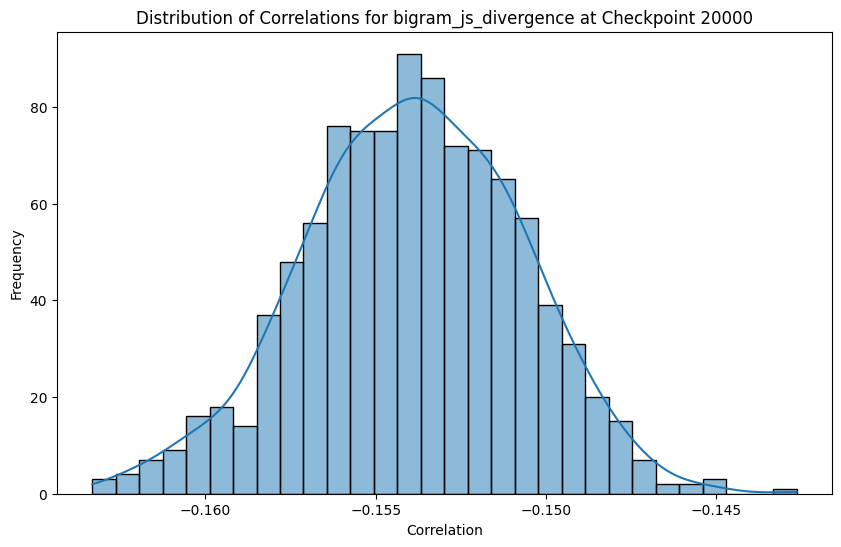

Checkpoint                       5000           10000          15000  \
Feature                                                                
bigram_js_divergence      1.799764e-01   2.072822e-09   0.000000e+00   
depth_of_parse_tree       9.990441e-01   7.603646e-01   1.447344e-26   
gpt2_perplexity           0.000000e+00  1.973750e-266  4.163075e-200   
gpt2_tokens_per_char      1.578297e-35   9.981206e-01   1.203831e-03   
named_entities            6.010536e-83   2.239787e-80  7.625461e-110   
pos_bigram_js_divergence  2.276832e-05   1.575815e-01  3.321206e-133   
pos_js_divergence         1.097332e-05   9.968868e-01   3.359440e-30   
unigram_js_divergence     7.805712e-11   1.542181e-39  8.315320e-168   

Checkpoint                        20000  
Feature                                  
bigram_js_divergence       0.000000e+00  
depth_of_parse_tree        2.576354e-26  
gpt2_perplexity           4.499664e-204  
gpt2_tokens_per_char       1.312603e-08  
named_entities            4

In [29]:

# Example of how to analyze results
# Visualize the distribution of correlations for a specific feature and checkpoint
feature_to_plot = features[0]  # Replace with actual feature
checkpoint_to_plot = (steps[-1])  # Replace with actual checkpoint
filtered_results = results_df[(results_df['Feature'] == feature_to_plot) & (results_df['Checkpoint'] == checkpoint_to_plot)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_results['Correlation'], kde=True, bins=30)
plt.title(f'Distribution of Correlations for {feature_to_plot} at Checkpoint {checkpoint_to_plot}')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

# average pvalue 
# Calculate average p-value for each feature and checkpoint
# average_p_values = results_df.groupby(['Feature', 'Checkpoint'])['P_value'].mean().unstack()
# print(average_p_values)

# max pvalue
# Calculate max 
max_p_values = results_df.groupby(['Feature', 'Checkpoint'])['P_value'].max().unstack()
print(max_p_values)

0.5064935064935064